In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [2]:
from collections import Counter

### main dataset ###
data = pd.read_csv("20151219.txt", sep = "\t", header = None)
data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

print(Counter(data["attack_flag"]))

Counter({-1: 149915, 1: 67713})


## Transform to binary

In [3]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 149915, 0: 67713})


## Visualize the attacks structure over time 

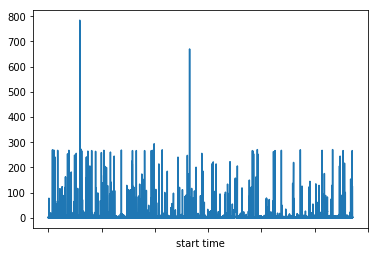

In [4]:
data_red = data.groupby('start time')['attack_flag'].sum()
data_red.plot()

In [5]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(217628, 24)
(217628, 21)


1    149915
0     67713
Name: attack_flag, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217628 entries, 0 to 217627
Data columns (total 18 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

In [7]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,6338,17989,udp
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,OTH,1,11,0,icmp
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,14015,17989,udp
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,S0,1,44074,53,udp
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,49263,25,tcp
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,58398,25,tcp
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,1.0,1.0,1.0,S0,1,55373,23,tcp
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,33244,25,tcp
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,0.0,0.0,1.0,S0,1,47476,25,tcp
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.0,0.0,0.0,S0,1,10106,17989,udp


In [8]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000,217628.000000
mean,0.855259,56.899333,122.064555,2.952263,0.417481,0.089564,0.542215,29.491720,31.876730,0.071694,0.066464,0.146028,0.688859,34292.130006,3550.084736
std,3.085410,519.846915,748.123612,5.519918,0.491905,0.284547,0.467622,44.351499,43.928101,0.256081,0.248495,0.350052,0.462961,19708.835701,10869.634486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12375.000000,25.000000
50%,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39682.000000,53.000000
75%,0.013333,45.000000,61.000000,5.000000,1.000000,0.000000,1.000000,96.000000,96.000000,0.000000,0.000000,0.000000,1.000000,50473.000000,1433.000000
max,563.012764,88066.000000,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65498.000000


In [9]:
# removing NaNs
data = data.dropna()
data.shape

(217628, 18)

In [10]:
data["Conn state"].value_counts(dropna=False)

S0        127464
SF         59944
RSTO       11476
OTH         8640
REJ         7998
RSTRH        733
RSTOS0       634
SHR          381
RSTR         304
S1            52
SH             2
Name: Conn state, dtype: int64

In [11]:
data["service"].value_counts(dropna=False)

other    126080
dns       61990
sip       16519
ssh       11518
snmp        665
smtp        495
rdp         328
dhcp         20
http         11
ssl           2
Name: service, dtype: int64

In [12]:
data["proto"].value_counts(dropna=False)

tcp     119162
udp      93548
icmp      4918
Name: proto, dtype: int64

## Change port number info to categorical

In [13]:
#data["src port"] = data["src port"].apply(str)
#data["dst port"] = data["dst port"].apply(str)
#data['src port'].nunique()
#data['dst port'].nunique()

#hot one encoding for src port numbers
#data = pd.concat([data, pd.get_dummies(data["src port"], prefix="is")], axis=1)

#hot one encoding for dst port numbers
#data = pd.concat([data, pd.get_dummies(data["dst port"], prefix="is")], axis=1)

## Hot one encoding

In [14]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)


,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
217618,0.410043,other,150,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217619,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
217620,1.215994,other,60,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217621,0.000000,dns,0,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217622,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217623,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217624,0.000000,other,0,0,0,0.0,0.0,1.0,2,2,...,0,0,0,0,0,1,0,0,0,0
217625,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
217626,0.000000,other,0,0,1,1.0,1.0,1.0,0,1,...,0,0,0,0,0,1,0,0,0,0
217627,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217628 entries, 0 to 217627
Data columns (total 42 columns):
conn len                       217628 non-null float64
service                        217628 non-null object
src bytes                      217628 non-null int64
dst bytes                      217628 non-null int64
conn numb                      217628 non-null int64
Same srv rate                  217628 non-null float64
Serror rate                    217628 non-null float64
Srv serror rate                217628 non-null float64
Dst host count                 217628 non-null int64
Dst host srv count             217628 non-null int64
Dst host same src port rate    217628 non-null float64
Dst host serror rate           217628 non-null float64
Dst host srv serror rate       217628 non-null float64
Conn state                     217628 non-null object
attack_flag                    217628 non-null int64
src port                       217628 non-null int64
dst port                 

## Data visualization

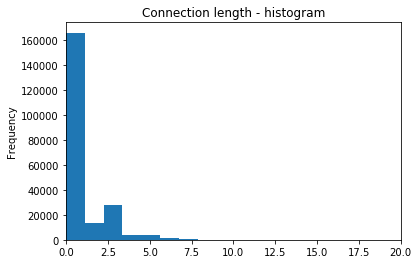

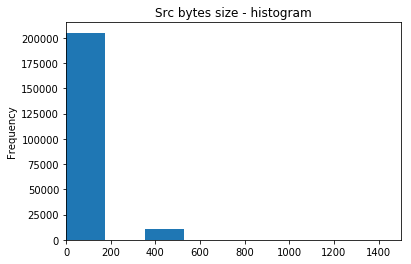

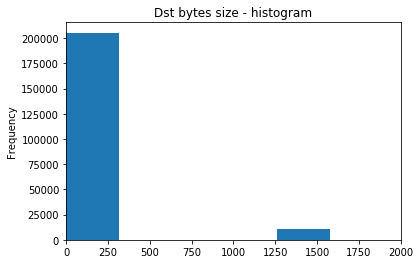

In [16]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=500, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

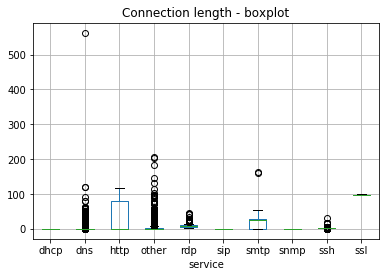

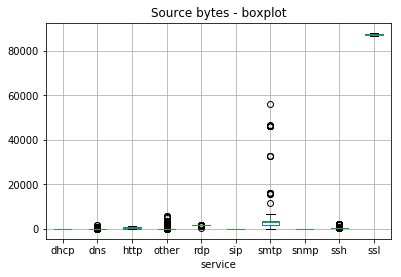

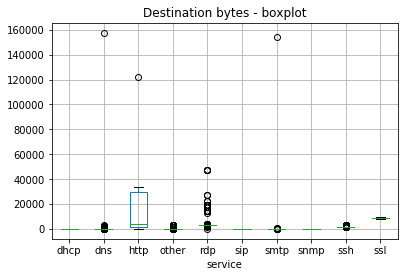

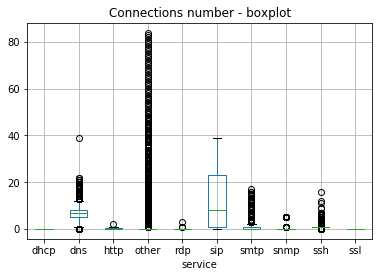

In [17]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

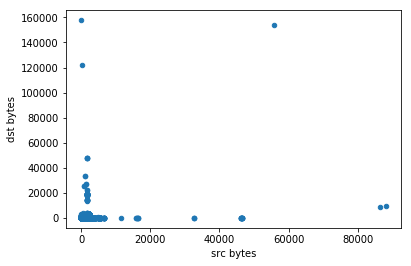

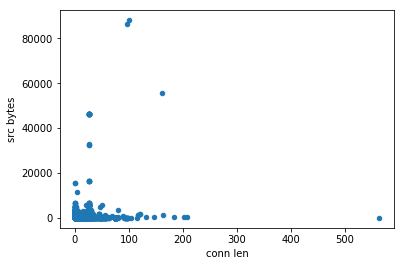

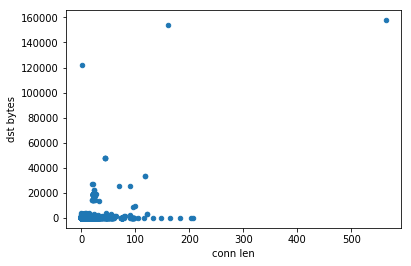

In [18]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [19]:
### drop categorical columns ####

data = data.drop(["service", "Conn state", "proto"], axis=1)
data.shape

(217628, 39)

## Plot function definition

In [20]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [34]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])
train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)
y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 30946, 0: 1699})
Counter({0: 22937, 1: 9707})
Counter({1: 109262, 0: 43077})


## Logistic Regression

In [33]:
from sklearn.model_selection import GridSearchCV

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
hyperparams = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag']}

In [43]:
#sorted(metrics.SCORERS.keys())

In [44]:
clf = GridSearchCV(LogisticRegression(), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
clf.fit(X_train, y_train)

print(clf.best_params_)


{'solver': 'liblinear'}


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'liblinear')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_validate)

name = "logistic Regression"

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Acc[name] = metrics.accuracy_score(y_validate, y_pred)
F1S[name] = metrics.f1_score(y_validate, y_pred)
Prec[name] = metrics.precision_score(y_validate, y_pred)
Rec[name] = metrics.recall_score(y_validate, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.99360, F1-score: 0.98935, Precision: 0.97892, Recall: 1.00000, FPR: 0.00911
TN: 22728; FP: 209; FN:    0; TP: 9707



# Decision Tree parameters selection

## Checking tree depth impact

In [47]:
# using gridsearchcv to find the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier(random_state=0).get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [48]:
hyperparams = {'max_depth' : range(1,12), 'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [51]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), hyperparams, cv=10, n_jobs=-1, scoring = "f1")
clf.fit(X_train, y_train)

print(clf.best_params_)

# max depth : 8

{'max_depth': 11, 'max_features': None}


In [52]:
classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_11":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 11),
               "DecisionTree_11":DecisionTreeClassifier(random_state=0, max_depth = 11),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.99917, F1-score: 0.99861, Precision: 0.99897, Recall: 0.99825, FPR: 0.00044
TN: 22927; FP:  10; FN:   17; TP: 9690

Algorithm: DecisionTree_ent_11 Accuracy: 0.99868, F1-score: 0.99779, Precision: 0.99763, Recall: 0.99794, FPR: 0.00100
TN: 22914; FP:  23; FN:   20; TP: 9687

Algorithm: DecisionTree_11 Accuracy: 0.99847, F1-score: 0.99743, Precision: 0.99599, Recall: 0.99887, FPR: 0.00170
TN: 22898; FP:  39; FN:   11; TP: 9696



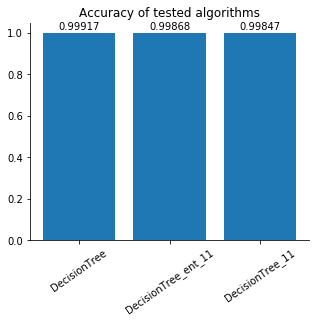

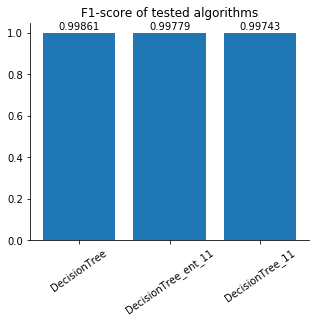

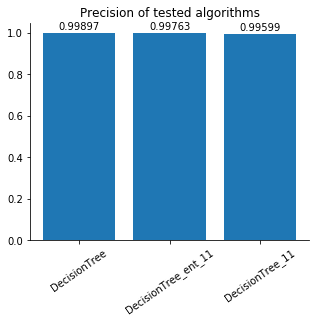

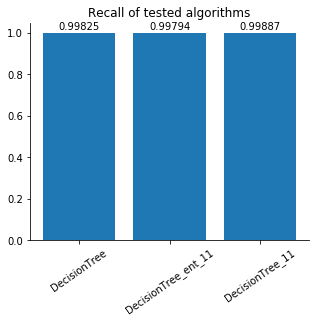

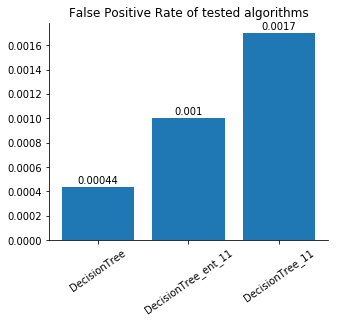

In [53]:
plot_stats(Acc, "Accuracy", 5, 35)
plot_stats(F1S, "F1-score", 5, 35)
plot_stats(Prec, "Precision", 5, 35)
plot_stats(Rec, "Recall", 5, 35)
plot_stats(FPR, "False Positive Rate", 5, 35)

## AdaBoost parameters selection

In [55]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth = 7)).get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 7,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [59]:
hyperparams = {"n_estimators" : range (1, 50)}

In [61]:
clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=0)), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)

# Result: {'n_estimators': 44}, range tested: 1-50

{'n_estimators': 44}


In [64]:
num_trees = 44
seed = 12

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier()
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.99902, F1-score: 0.99835, Precision: 0.99743, Recall: 0.99928, FPR: 0.00109
TN: 22912; FP:  25; FN:    7; TP: 9700

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.99899, F1-score: 0.99830, Precision: 0.99722, Recall: 0.99938, FPR: 0.00118
TN: 22910; FP:  27; FN:    6; TP: 9701

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.99905, F1-score: 0.99840, Precision: 0.99753, Recall: 0.99928, FPR: 0.00105
TN: 22913; FP:  24; FN:    7; TP: 9700

Algorithm: AdaBoost_n_est Accuracy: 0.99767, F1-score: 0.99610, Precision: 0.99334, Recall: 0.99887, FPR: 0.00283
TN: 22872; FP:  65; FN:   11; TP: 9696

Algorithm: AdaBoost_n_est_0 Accuracy: 0.99767, F1-score: 0.99610, Precision: 0.99334, Recall: 0.99887, FPR: 0.00283
TN: 22872; FP:  65; FN:   11; TP: 9696

Algorithm: AdaBoost_orig Accuracy: 0.99804, F1-score: 0.99671, Precision: 0.99456, Recall: 0.99887, FPR: 0.00231
TN: 22884; FP:  53; FN:   11; TP: 9696



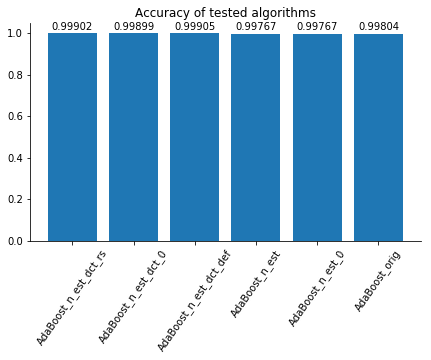

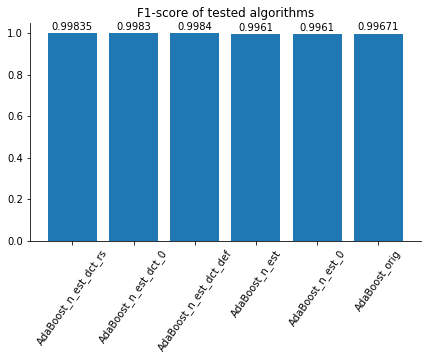

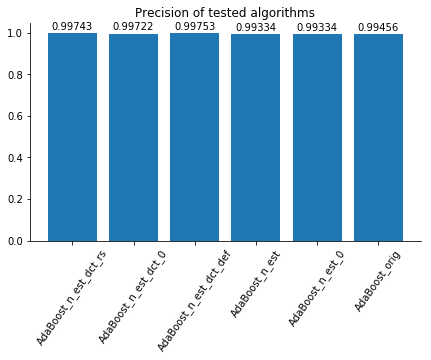

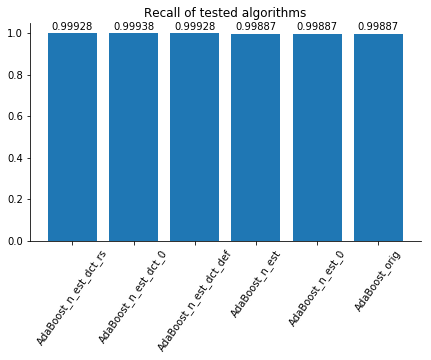

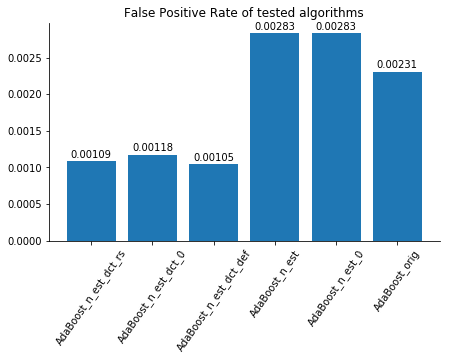

In [65]:
plot_stats(Acc, "Accuracy",7,  55)
plot_stats(F1S, "F1-score", 7, 55)
plot_stats(Prec, "Precision", 7, 55)
plot_stats(Rec, "Recall", 7, 55)
plot_stats(FPR, "False Positive Rate", 7, 55)

## Random tree parameters selection

In [77]:
hyperparams = {'max_depth' : range(1,12), 'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [78]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0, splitter = "random"), hyperparams, cv=10, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)

{'max_depth': 11, 'max_features': None}


In [68]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_11":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 11),                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.98582, F1-score: 0.99250, Precision: 0.99519, Recall: 0.98982, FPR: 0.08711
TN: 1551; FP: 148; FN:  315; TP: 30631

Algorithm: RandomTree_11 Accuracy: 0.98358, F1-score: 0.99133, Precision: 0.99204, Recall: 0.99063, FPR: 0.14479
TN: 1453; FP: 246; FN:  290; TP: 30656



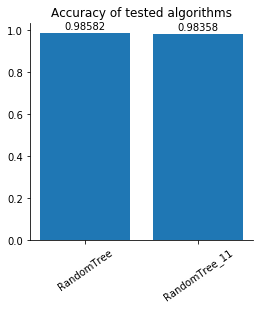

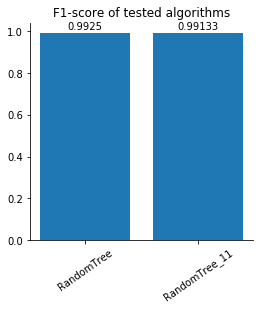

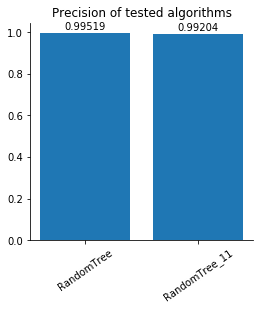

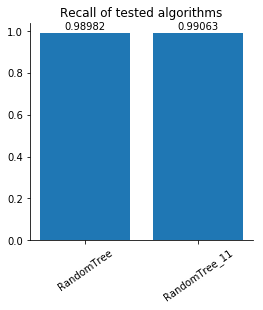

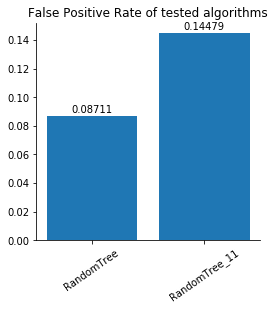

In [69]:
plot_stats(Acc, "Accuracy",4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

## Random Forest parameters selection

In [79]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [80]:
hyperparams = {'n_estimators' : range(1, 50)}

In [81]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
#clf.fit(X_train, y_train)

#print(clf.best_params_)

# {'n_estimators': 47}

{'n_estimators': 47}


In [82]:
hyperparams = {'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [84]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=47), hyperparams, cv=5 ,scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)
# {'max_features': 'auto'}

{'max_features': 'auto'}


In [86]:
hyperparams = {'max_depth' : range(1,50)}

In [87]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=47, max_features='auto'), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)
# {'max_depth': 28}

{'max_depth': 28}


In [91]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

classifiers = {
                "RandomForest_new":RandomForestClassifier(n_estimators=47, max_depth=28, random_state=0),
                "RandomForest_orig":RandomForestClassifier(),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest_new Accuracy: 0.98808, F1-score: 0.99370, Precision: 0.99546, Recall: 0.99195, FPR: 0.08240
TN: 1559; FP: 140; FN:  249; TP: 30697



/home/matz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Algorithm: RandomForest_orig Accuracy: 0.98787, F1-score: 0.99358, Precision: 0.99643, Recall: 0.99076, FPR: 0.06474
TN: 1589; FP: 110; FN:  286; TP: 30660



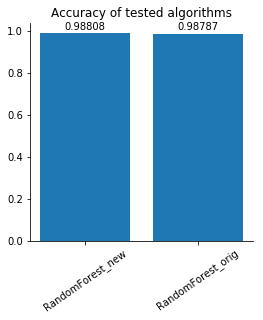

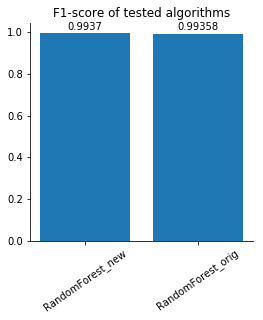

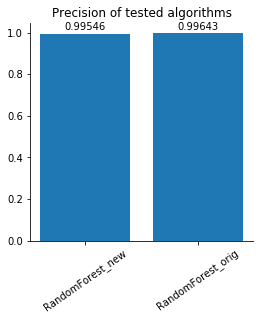

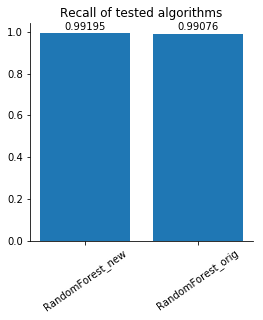

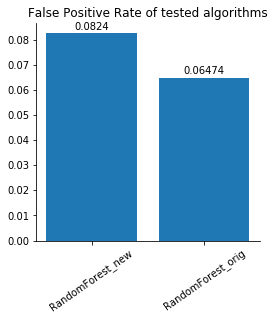

In [92]:
plot_stats(Acc, "Accuracy", 4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

# Algorithms' performance comparison

In [100]:
from collections import Counter

print(Counter(y_test))

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Counter({1: 30946, 0: 1699})


In [101]:
# Metrics of baseline method
name = "baseline"

if(y_test.mean() > (1-y_test.mean())):
    y_pred = np.ones(len(y_test)).ravel() 
else:
    y_pred = np.zeros(len(y_test)).ravel() 
    
Acc[name] = metrics.accuracy_score(y_test, y_pred)
F1S[name] = metrics.f1_score(y_test, y_pred)
Prec[name] = metrics.precision_score(y_test, y_pred)
Rec[name] = metrics.recall_score(y_test, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: baseline     Accuracy: 0.94796, F1-score: 0.97328, Precision: 0.94796, Recall: 1.00000, FPR: 1.00000
TN:   0; FP: 1699; FN:    0; TP: 30946



In [102]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

seed = 12

classifiers = {"LogisticReg":LogisticRegression(solver = 'liblinear'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=47, max_depth=28, random_state=0),
              }


for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: LogisticReg  Accuracy: 0.96698, F1-score: 0.98260, Precision: 0.98165, Recall: 0.98355, FPR: 0.33490
TN: 1130; FP: 569; FN:  509; TP: 30437

Algorithm: AdaBoost     Accuracy: 0.98793, F1-score: 0.99362, Precision: 0.99639, Recall: 0.99086, FPR: 0.06533
TN: 1588; FP: 111; FN:  283; TP: 30663

Algorithm: DecisionTree Accuracy: 0.98870, F1-score: 0.99403, Precision: 0.99569, Recall: 0.99237, FPR: 0.07828
TN: 1566; FP: 133; FN:  236; TP: 30710

Algorithm: NaiveBayes   Accuracy: 0.96542, F1-score: 0.98174, Precision: 0.98274, Recall: 0.98074, FPR: 0.31371
TN: 1166; FP: 533; FN:  596; TP: 30350

Algorithm: RandomTree   Accuracy: 0.98582, F1-score: 0.99250, Precision: 0.99519, Recall: 0.98982, FPR: 0.08711
TN: 1551; FP: 148; FN:  315; TP: 30631

Algorithm: RandomForest Accuracy: 0.98808, F1-score: 0.99370, Precision: 0.99546, Recall: 0.99195, FPR: 0.08240
TN: 1559; FP: 140; FN:  249; TP: 30697



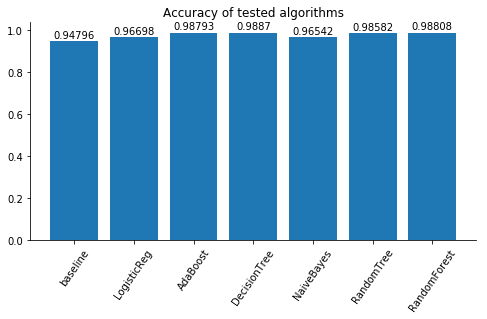

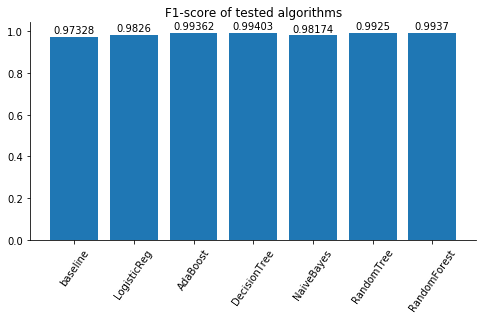

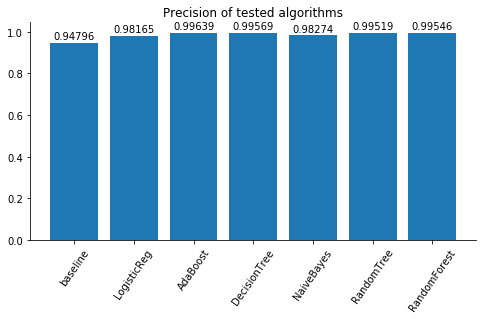

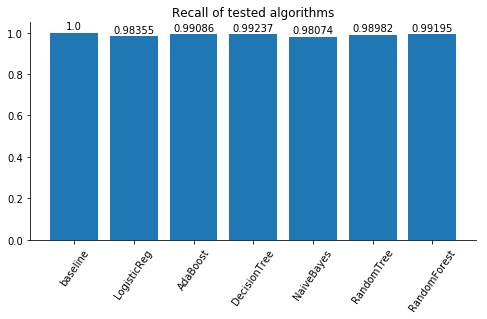

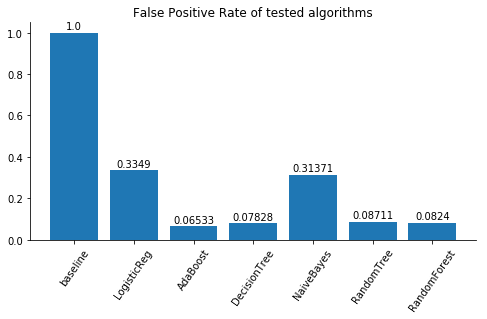

In [103]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Scaling

In [104]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

seed = 12

classifiers = {"LogisticReg":LogisticRegression(solver = 'liblinear'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=47, max_depth=28, random_state=0),
              }

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Algorithm: LogisticReg_scaled Accuracy: 0.96407, F1-score: 0.98097, Precision: 0.98517, Recall: 0.97680, FPR: 0.26780
TN: 1244; FP: 455; FN:  718; TP: 30228



/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: AdaBoost_scaled Accuracy: 0.98762, F1-score: 0.99346, Precision: 0.99591, Recall: 0.99102, FPR: 0.07416
TN: 1573; FP: 126; FN:  278; TP: 30668



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: 

Algorithm: DecisionTree_scaled Accuracy: 0.98870, F1-score: 0.99403, Precision: 0.99566, Recall: 0.99241, FPR: 0.07887
TN: 1565; FP: 134; FN:  235; TP: 30711



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Algorithm: NaiveBayes_scaled Accuracy: 0.94915, F1-score: 0.97260, Precision: 0.99410, Recall: 0.95201, FPR: 0.10300
TN: 1524; FP: 175; FN: 1485; TP: 29461



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Algorithm: RandomTree_scaled Accuracy: 0.98582, F1-score: 0.99250, Precision: 0.99519, Recall: 0.98982, FPR: 0.08711
TN: 1551; FP: 148; FN:  315; TP: 30631

Algorithm: RandomForest_scaled Accuracy: 0.98799, F1-score: 0.99366, Precision: 0.99540, Recall: 0.99192, FPR: 0.08358
TN: 1557; FP: 142; FN:  250; TP: 30696



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


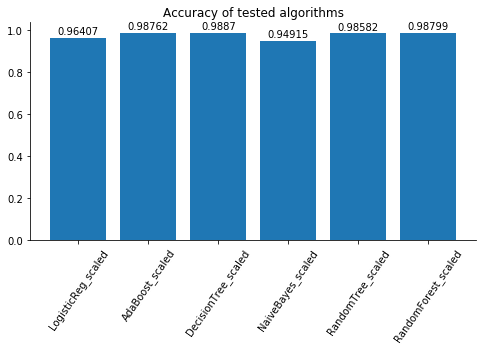

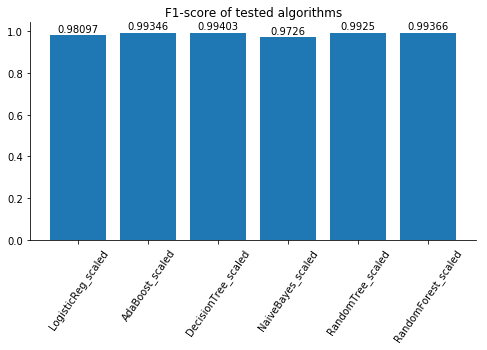

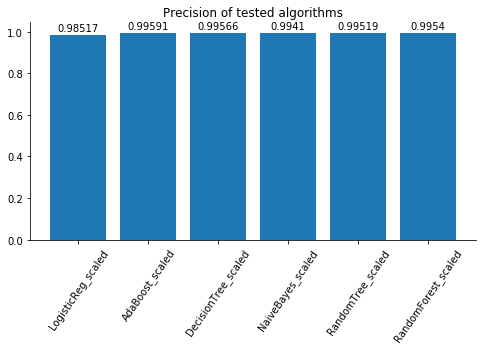

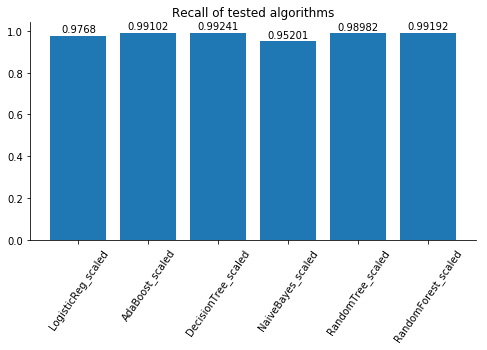

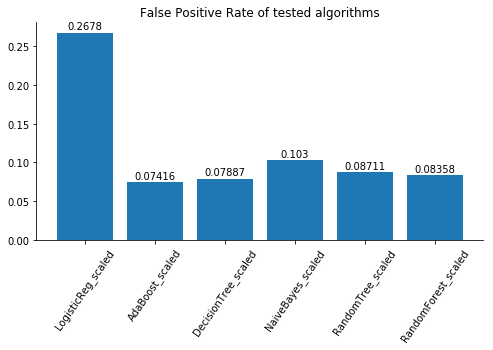

In [105]:
plot_stats(Acc, "Accuracy", 8, 55)
plot_stats(F1S, "F1-score", 8, 55)
plot_stats(Prec, "Precision", 8, 55)
plot_stats(Rec, "Recall", 8, 55)
plot_stats(FPR, "False Positive Rate", 8, 55)

## Results comparison

In [125]:
classifiers = {"LogisticReg":LogisticRegression(solver = 'liblinear'),
               "AdaBoost":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 11), n_estimators=num_trees),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=47, max_depth=28, random_state=0),
              }

y_pred = {}

y_pred["baseline"] = y_pred["baseline"].astype(int)     

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred[name] = model.predict(X_test)
    
print(y_pred.keys())

dict_keys(['baseline', 'LogisticReg', 'AdaBoost', 'DecisionTree', 'NaiveBayes', 'RandomTree', 'RandomForest'])


In [126]:
print(y_pred["baseline"])

[1 1 1 ... 1 1 1]


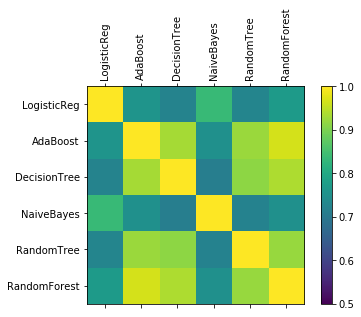

In [136]:
y_pred_pand = pd.DataFrame.from_dict(y_pred)
names = ["LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest"]
correlations = y_pred_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0.5, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [135]:
print(correlations)

              LogisticReg  AdaBoost  DecisionTree  NaiveBayes  RandomTree  \
LogisticReg      1.000000  0.759293      0.723916    0.837152    0.728319   
AdaBoost         0.759293  1.000000      0.932975    0.750331    0.924909   
DecisionTree     0.723916  0.932975      1.000000    0.714546    0.915234   
NaiveBayes       0.837152  0.750331      0.714546    1.000000    0.722504   
RandomTree       0.728319  0.924909      0.915234    0.722504    1.000000   
RandomForest     0.771663  0.967999      0.937839    0.751761    0.923413   

              RandomForest  
LogisticReg       0.771663  
AdaBoost          0.967999  
DecisionTree      0.937839  
NaiveBayes        0.751761  
RandomTree        0.923413  
RandomForest      1.000000  


In [166]:
failures["baseline"] = []
failures["LogisticReg"] = []
failures["AdaBoost"] = []
failures["DecisionTree"] = []
failures["NaiveBayes"] = []
failures["RandomTree"] = []
failures["RandomForest"] = []

for i in range(0, len(y_test)):
    for key in y_pred.keys():
        if y_pred[key][i] != y_test[i]:
            failures[key].append(1)
        else:
            failures[key].append(0)   


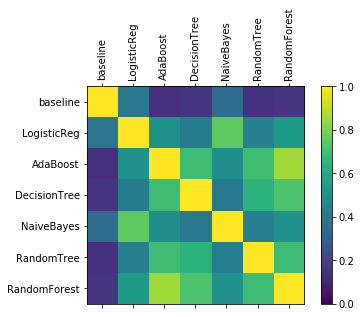

In [171]:
failures_pand = pd.DataFrame.from_dict(failures)
names = ["baseline", "LogisticReg", "AdaBoost", "DecisionTree", "NaiveBayes", "RandomTree", "RandomForest"]
correlations = failures_pand[names].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation='vertical')
ax.set_yticklabels(names)
plt.show()

In [170]:
print(correlations)

              baseline  LogisticReg  AdaBoost  DecisionTree  NaiveBayes  \
baseline      1.000000     0.395841  0.135049      0.148453    0.357935   
LogisticReg   0.395841     1.000000  0.509835      0.421310    0.753080   
AdaBoost      0.135049     0.509835  1.000000      0.689861    0.496099   
DecisionTree  0.148453     0.421310  0.689861      1.000000    0.404760   
NaiveBayes    0.357935     0.753080  0.496099      0.404760    1.000000   
RandomTree    0.144512     0.437406  0.688891      0.646378    0.430986   
RandomForest  0.152205     0.546866  0.855485      0.717289    0.504510   

              RandomTree  RandomForest  
baseline        0.144512      0.152205  
LogisticReg     0.437406      0.546866  
AdaBoost        0.688891      0.855485  
DecisionTree    0.646378      0.717289  
NaiveBayes      0.430986      0.504510  
RandomTree      1.000000      0.686359  
RandomForest    0.686359      1.000000  
